<a href="https://colab.research.google.com/github/foramirez50/CDA/blob/main/parcial2CDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## instalación de librerías a utilizar

In [24]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.4 MB/s 


In [9]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
import joblib
import pandas as pd
from sklearn import metrics

from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score


## carga de modelo y dataset

In [12]:
df = pd.read_csv('/content/diabetes_test.csv',',')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


In [13]:
df.head(10)

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_fn,age,diabetes
0,5,88,78,30,0,27.6,0.258,37,0
1,3,61,82,28,0,34.4,0.243,46,0
2,8,183,64,0,0,23.3,0.672,32,1
3,6,80,80,36,0,39.8,0.177,28,0
4,8,108,70,0,0,30.5,0.955,33,1
5,1,101,50,15,36,24.2,0.526,26,0
6,0,141,84,26,0,32.4,0.433,22,0
7,0,107,76,0,0,45.3,0.686,24,0
8,9,124,70,33,402,35.4,0.282,34,0
9,10,75,82,0,0,33.3,0.263,38,0


In [14]:
model=joblib.load('/content/diabetes-v1.0.joblib')

In [17]:
X = df.drop("diabetes", axis=1)
Y = df["diabetes"]

In [18]:
X.head(10)

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_fn,age
0,5,88,78,30,0,27.6,0.258,37
1,3,61,82,28,0,34.4,0.243,46
2,8,183,64,0,0,23.3,0.672,32
3,6,80,80,36,0,39.8,0.177,28
4,8,108,70,0,0,30.5,0.955,33
5,1,101,50,15,36,24.2,0.526,26
6,0,141,84,26,0,32.4,0.433,22
7,0,107,76,0,0,45.3,0.686,24
8,9,124,70,33,402,35.4,0.282,34
9,10,75,82,0,0,33.3,0.263,38


In [19]:
Y.head(10)

0    0
1    0
2    1
3    0
4    1
5    0
6    0
7    0
8    0
9    0
Name: diabetes, dtype: int64

## Punto 1. saber falsos positivos y negativos

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       100
           1       0.67      0.48      0.56        54

    accuracy                           0.73       154
   macro avg       0.71      0.68      0.68       154
weighted avg       0.73      0.73      0.72       154



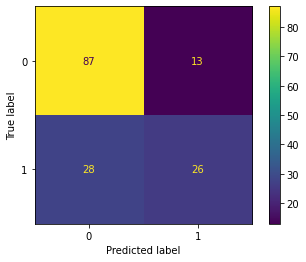

In [23]:
predictions = model.predict(X)

ConfusionMatrixDisplay.from_predictions(Y, predictions)

print(metrics.classification_report(Y, predictions))

## el punto 2 se sabe por simple conocimiento de la definición de precisión

## punto 3

In [40]:
import shap
import numpy as np


Exact explainer: 155it [00:15,  3.66it/s]


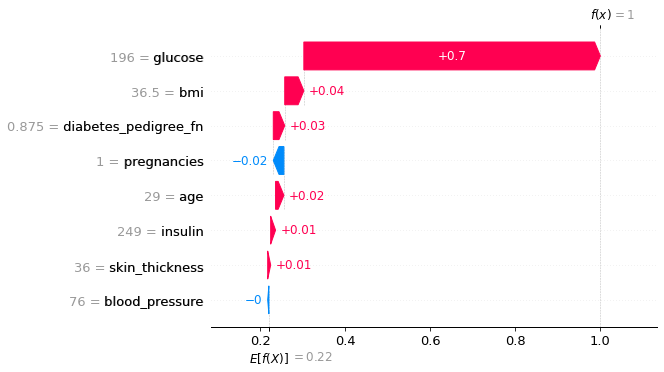

In [68]:
#se escoge la posición 73 porque tiene el más alto valor de glucosa .. buscado en el excel
explainer = shap.Explainer(model.predict,X)
shap_values = explainer(X)

shap.plots.waterfall(shap_values[73])


## punto 4

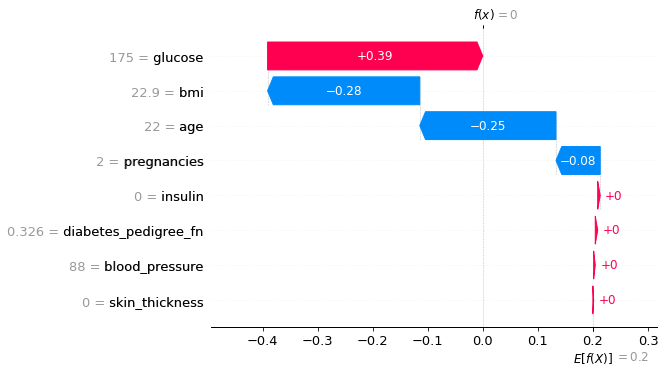

In [55]:
# se busca en el excel los valores que dicen en el punto4 y es la posición 142
shap.plots.waterfall(shap_values[142])

# haciendo una aproximación de los datos, con una regla de 3 ...
# 0.08x22 / 0.28, con los datos que se tienen, da que la edad para que de aproximadamente 0.08 es de aproximadamente +6 años, entonces la edad para que diera positivo (en el predicho 0.2) sería 28 años aproximadamente.

## Punto5

# New Section